In [52]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [174]:
source_activity = 1000.0 # gammas per s
# inner_radius = 1 # m
# detector_x = 0.1 # m
# detector_y = 0.1 # m
# detector_area = detector_x * detector_y # m^2
# solid_angle = detector_area / (4 * np.pi * inner_radius ** 2)
solid_angle= 0.5
incidient_gamma_energy = 500 # keV

# at 500 keV
mu_rho = 8.212e-02 #at 500 keV
pe_mu_rho = 3.541e-03 #at 500 keV, just photo electric
density_ge = 5.323 # g/cm^3

# canberra BEGe detector p-type, 5% efficiecncy at 500 keV

thickness_list = np.linspace(0, 30, 100) # cm
number_of_layers =  2

# detector_area = solid_angle * (4 * np.pi * inner_radius_1 ** 2)
# print (detector_area)

incident_gamma_list = []
outgoing_gamma_list = []
total_stopped_list = []
total_absorbed_list = []
efficiency_pe_list = []
efficiency_list = []

for thickness in thickness_list:
    incident_gamma = source_activity * solid_angle
    total_stopped = 0
    total_absorbed = 0
    for layer in range(0, number_of_layers + 1, 1):
        thickness = thickness / number_of_layers
        absorbed_gamma = 0
        stopped_gamma = 0
        incident_gamma_list.append(incident_gamma)
        outgoing_gamma = incident_gamma * np.exp(-mu_rho * density_ge * thickness)
        stopped_gamma = incident_gamma - outgoing_gamma
        absorbed_gamma = incident_gamma * (1 - np.exp(-pe_mu_rho * density_ge * thickness))
        outgoing_gamma_list.append(outgoing_gamma)
        incident_gamma = outgoing_gamma
        outgoing_gamma = 0
        total_stopped = total_stopped + stopped_gamma
        total_absorbed = total_absorbed + absorbed_gamma 
    
    efficiency_pe_list.append(total_absorbed / source_activity)
    efficiency_list.append(total_stopped / source_activity)
    total_stopped_list.append(total_stopped)
    total_absorbed_list.append(total_absorbed)

#print("thickness")
#print(thickness_list)
#print("abs")
#print(total_absorbed_list)
#print("stopped")
#print(total_stopped_list)
#print("efficiency")
#print(efficiency_list)
#print("incident_gamma_list")
#print(incident_gamma_list)
#print("outgoing_gamma_list")
#print(outgoing_gamma_list)
#print("total_stopped_list")
#print(total_stopped_list)

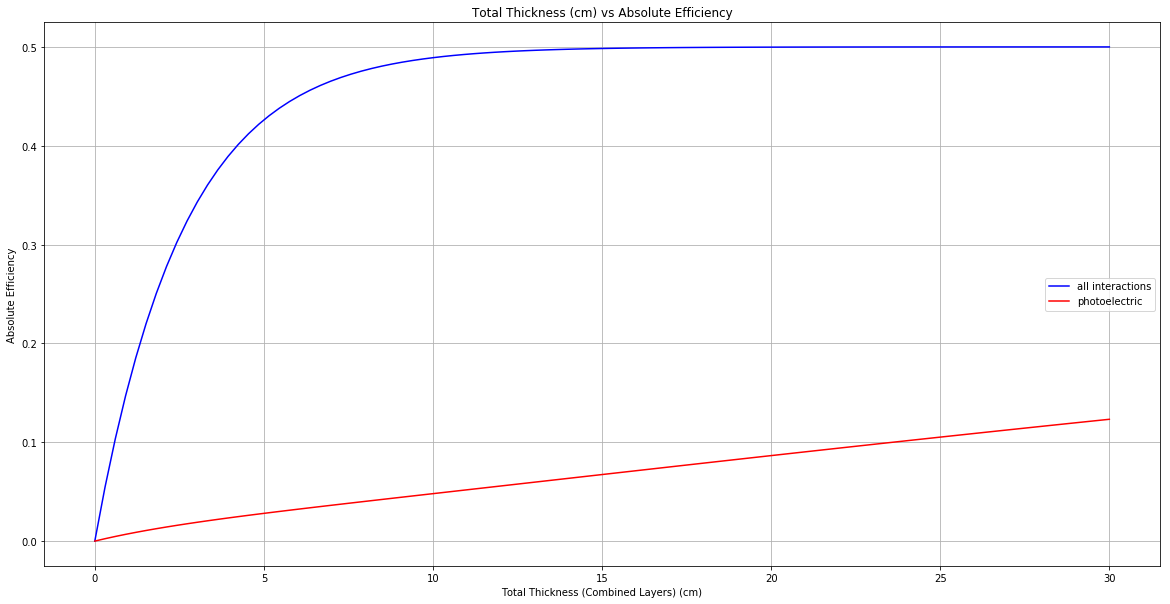

In [179]:
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
plt.figure(figsize=(20, 10))


plt.plot(thickness_list, efficiency_list, linestyle='-', color='blue', label="all interactions")
plt.plot(thickness_list, efficiency_pe_list, linestyle='-', color='red', label="photoelectric")
plt.legend(loc='right')
plt.title('Total Thickness (cm) vs Absolute Efficiency')
plt.xlabel('Total Thickness (Combined Layers) (cm)')
plt.ylabel('Absolute Efficiency')

loc = plticker.MultipleLocator(base=intervals)
plt.grid(True)
plt.savefig('../efficiencyplot_2layers.png')
plt.show()
